In [6]:
# Import libraries and set desired options
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.utils.validation import column_or_1d
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [78]:
datast=pd.read_excel('dataset_apprr.xlsx')

In [79]:
datast.head()

,path,code_error,anomalie,méthode,duration,direction,type,Mode_authApp_Axway,Mode_authAxway_Backend
0,/UDV-preprod/v13/UDVvdb_14/WellLink/DrillerTim...,400 Bad Request,Failure BackEnd,GET,30260,axway-BackEnd,REST,API Key,No Authentication
1,/monetique/conducteur,412 Precondition Failed,XSD validation failed,POST,37,axway,REST,Oauth,No Authentication
2,/fuel/v1/whitelabel/stations/ND036699/pumpandp...,403 Forbidden,Application Not Authorized,GET,37,axway,REST,API Key,No Authentication
3,/01-ELUB/eOrder,403 Forbidden,The client IP is denied access,POST,18,axway,SOAP,No authentication,No Authentication
4,/01-ELUB/eOrder,403 Forbidden,The client IP is denied access,POST,15,axway,SOAP,No authentication,No Authentication


In [16]:
print(type(datast))

<class 'pandas.core.frame.DataFrame'>


In [36]:
print(datast.columns)

Index(['path', 'code_error', 'anomlaie ', 'méthode', 'duration', 'direction',
       'type', 'Mode_authApp_Axway', 'Mode_authAxway_Backend'],
      dtype='object')


In [16]:
enc = OrdinalEncoder()
X=datast.iloc[:,:].values
labelencoder_X=LabelEncoder()
X[:,1:3]=labelencoder_X.fit_transform(X[:,1:3])
#enc = OrdinalEncoder()
#X=enc.fit(X[:,1])

Y=pd.DataFrame(X)
Y.head()
xx=pd.DataFrame(X_train)
xx.head()


ValueError: bad input shape (357, 2)

In [68]:
print("hello world")

hello world


In [83]:
data_dummies = pd.get_dummies(datast, prefix=['T','M','D','C','MAA','MAB',], columns=["type","méthode","direction",'code_error','Mode_authApp_Axway','Mode_authAxway_Backend'])
display(data_dummies.columns)
df=data_dummies.drop(["path"],axis=1)
df.head(5)



Index(['path', 'anomalie', 'duration', 'T_REST', 'T_SOAP', 'M_GET', 'M_POST',
       'D_axway', 'D_axway-BackEnd', 'C_400 Bad Request',
       'C_401 Security failure', 'C_401 Unauthorized', 'C_403 Forbidden',
       'C_403 No match found for request', 'C_405 Method Not Allowed',
       'C_412 Precondition Failed', 'C_500 Internal Server Error',
       'MAA_API Key', 'MAA_No authentication', 'MAA_Oauth', 'MAA_Pass Through',
       'MAB_Authorization - Basic', 'MAB_No Authentication'],
      dtype='object')

,anomalie,duration,T_REST,T_SOAP,M_GET,M_POST,D_axway,D_axway-BackEnd,C_400 Bad Request,C_401 Security failure,...,C_403 No match found for request,C_405 Method Not Allowed,C_412 Precondition Failed,C_500 Internal Server Error,MAA_API Key,MAA_No authentication,MAA_Oauth,MAA_Pass Through,MAB_Authorization - Basic,MAB_No Authentication
0,Failure BackEnd,30260,1,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,XSD validation failed,37,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,Application Not Authorized,37,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,The client IP is denied access,18,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,The client IP is denied access,15,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [89]:
df['anomalie_id'] = df['anomalie'].factorize()[0]
from io import StringIO
anomalie_id_df = df[['anomalie', 'anomalie_id']].drop_duplicates().sort_values('anomalie_id')
anomalie_to_id = dict(anomalie_id_df.values)
id_to_anomlaie = dict(anomalie_id_df[['anomalie_id', 'anomalie']].values)

In [90]:
df.head()

,anomalie,duration,T_REST,T_SOAP,M_GET,M_POST,D_axway,D_axway-BackEnd,C_400 Bad Request,C_401 Security failure,...,C_405 Method Not Allowed,C_412 Precondition Failed,C_500 Internal Server Error,MAA_API Key,MAA_No authentication,MAA_Oauth,MAA_Pass Through,MAB_Authorization - Basic,MAB_No Authentication,anomalie_id
0,Failure BackEnd,30260,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,XSD validation failed,37,1,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
2,Application Not Authorized,37,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,2
3,The client IP is denied access,18,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,3
4,The client IP is denied access,15,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,3


In [88]:
data_norm=data_dummies_d.iloc[:,1:].values

X_normalized = preprocessing.normalize(data_norm, norm='l2')
print(X_normalized)


[[9.99999997e-01 3.30469265e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.30469265e-05]
 [9.97815796e-01 2.69679945e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.69679945e-02]
 [9.97815796e-01 2.69679945e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.69679945e-02]
 ...
 [9.88483301e-01 6.17802063e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.17802063e-02]
 [9.99999997e-01 3.05166467e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.05166467e-05]
 [9.76092160e-01 8.87356509e-02 0.00000000e+00 ... 8.87356509e-02
  0.00000000e+00 8.87356509e-02]]


In [96]:
# Creating the Training and Test set from data
X = df.iloc[:,1:22].values
y = df.iloc[:,22].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [103]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [145]:
num_folds=7
scoring='accuracy'
models = []
models.append(('LR',  LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',  RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)))

# evaluate each model in turn
results = []
names = []
entries= []
for name, model in models:
    kfold = model_selection.KFold(n_splits=num_folds, random_state=0)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    entries.append((name,cv_results.mean()))
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    Accuracy=cv_results.mean()
    print(msg)
    cv_df = pd.DataFrame(entries, columns=['name','Accuracy'])

C:\Users\abderrahmane.jouilil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abderrahmane.jouilil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\abderrahmane.jouilil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abderrahmane.jouilil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silenc

LR: 0.973481 (0.020166)
KNN: 0.924507 (0.029650)
CART: 0.969620 (0.022603)
NB: 0.962000 (0.034856)
SVM: 0.973481 (0.014450)
RF: 0.890469 (0.041136)


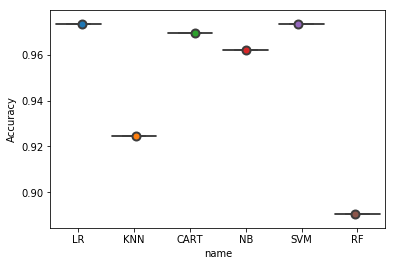

In [146]:
sns.boxplot(x='name', y='Accuracy', data=cv_df)
sns.stripplot(x='name', y='Accuracy', data= cv_df,size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [5]:
classifier_RF = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)
# Predicting the Test set results
y_pred_RF = classifier_RF.predict(X_test)
#matrice de confusion
conf_mat_RF = confusion_matrix(y_test, y_pred_RF)

print(conf_mat_RF)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat_RF, annot=True, fmt='d',
            xticklabels=anomalie_id_df.anomalie.values, yticklabels=anomalie_id_df.anomalie.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# accuracy : pourcentage de bonnes predictions
#Accuracy= accuracy_score(y_test, y_pred_RF)
#print(Accuracy)


NameError: name 'X_train' is not defined